In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date

In [4]:
df = pd.read_csv('Health_insurance.csv')

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,NaN,yes,southwest,16884.92400
1,18,m,33.770,1.0,no,southeast,1725.55230
2,28,male,NaN,3.0,no,southeast,4449.46200
3,33,male,22.705,NaN,no,northwest,21984.47061
4,32,male,28.880,NaN,no,northwest,3866.85520
5,31,female,25.740,NaN,no,southeast,3756.62160
6,46,female,33.440,1.0,no,southeast,8240.58960
7,37,female,27.740,3.0,no,northwest,7281.50560
8,37,male,29.830,2.0,no,northeast,6406.41070
9,60,f,25.840,NaN,no,northwest,28923.13692


In [4]:
df.isnull().sum()

age          0
sex          0
bmi          1
children    13
smoker       0
region       0
charges      0
dtype: int64

In [5]:
##data cleaning
df = df.dropna(subset=['children'])
df.isnull().sum()

age         0
sex         0
bmi         1
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.sex.unique()

array(['m', 'male', 'female'], dtype=object)

In [7]:
##data cleaning
def replaceGender():
    df.replace('m','male',inplace=True)
    df.replace('f','female',inplace=True)

replaceGender()
df.head(10)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,NaN,3.0,no,southeast,4449.46200
6,46,female,33.440,1.0,no,southeast,8240.58960
7,37,female,27.740,3.0,no,northwest,7281.50560
8,37,male,29.830,2.0,no,northeast,6406.41070
15,19,male,24.600,1.0,no,southwest,1837.23700
16,52,female,30.780,1.0,no,northeast,10797.33620
20,60,female,36.005,1.0,no,northeast,13228.84695
21,30,female,32.400,1.0,no,southwest,4149.73600
22,18,male,34.100,0.0,no,southeast,1137.01100


In [8]:
##data cleaning
df.bmi.fillna(df.bmi.mean(),inplace=True)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770000,1.0,no,southeast,1725.55230
2,28,male,30.768259,3.0,no,southeast,4449.46200
6,46,female,33.440000,1.0,no,southeast,8240.58960
7,37,female,27.740000,3.0,no,northwest,7281.50560
8,37,male,29.830000,2.0,no,northeast,6406.41070
15,19,male,24.600000,1.0,no,southwest,1837.23700
16,52,female,30.780000,1.0,no,northeast,10797.33620
20,60,female,36.005000,1.0,no,northeast,13228.84695
21,30,female,32.400000,1.0,no,southwest,4149.73600
22,18,male,34.100000,0.0,no,southeast,1137.01100


In [9]:
##data tranforms
df2 = pd.get_dummies(df[['smoker']])
df2.head()

,smoker_no,smoker_yes
1,1,0
2,1,0
6,1,0
7,1,0
8,1,0


In [10]:
df = pd.concat([df,df2],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_no,smoker_yes
1,18,male,33.770000,1.0,no,southeast,1725.5523,1,0
2,28,male,30.768259,3.0,no,southeast,4449.4620,1,0
6,46,female,33.440000,1.0,no,southeast,8240.5896,1,0
7,37,female,27.740000,3.0,no,northwest,7281.5056,1,0
8,37,male,29.830000,2.0,no,northeast,6406.4107,1,0


In [14]:
##data transform
df['birthyear'] = 2023 - df['age']
df.head(5)

,age,sex,bmi,children,smoker,region,charges,smoker_no,smoker_yes,birthyear
1,18,male,33.770000,1.0,no,southeast,1725.5523,1,0,2005
2,28,male,30.768259,3.0,no,southeast,4449.4620,1,0,1995
6,46,female,33.440000,1.0,no,southeast,8240.5896,1,0,1977
7,37,female,27.740000,3.0,no,northwest,7281.5056,1,0,1986
8,37,male,29.830000,2.0,no,northeast,6406.4107,1,0,1986


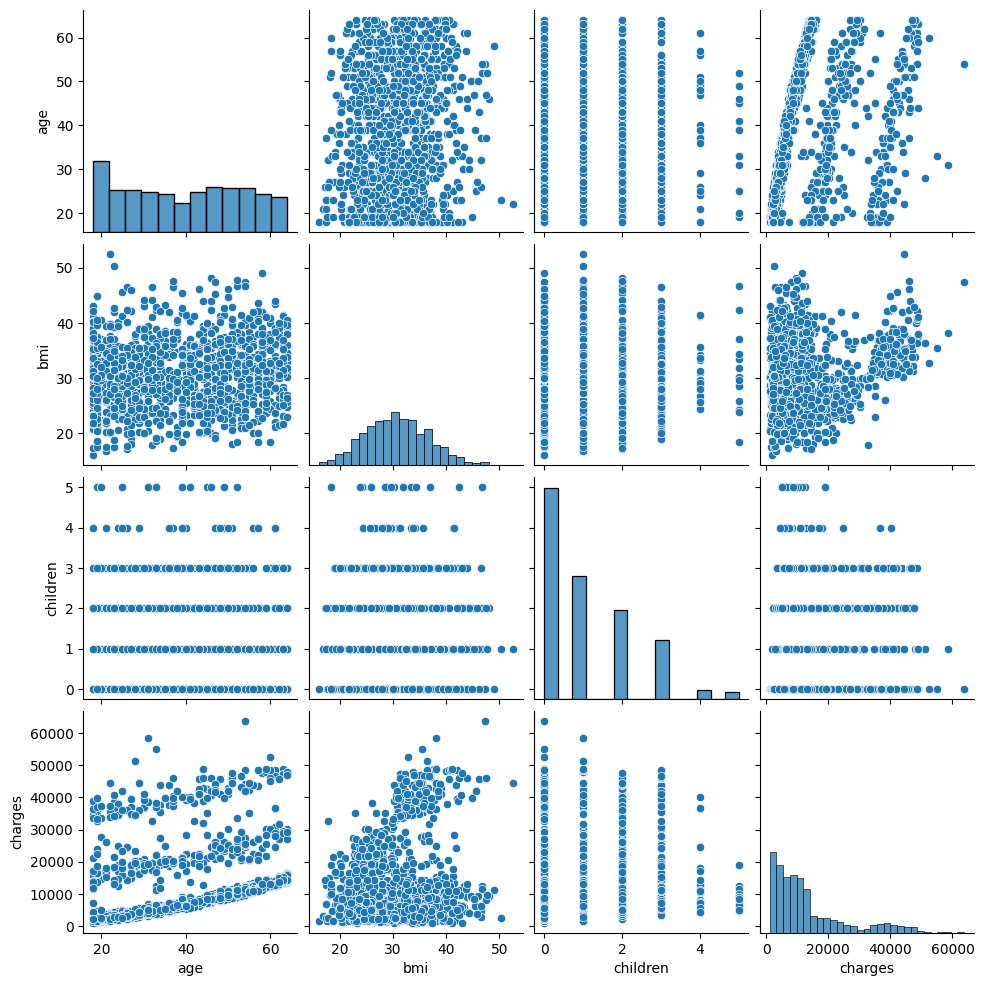

In [10]:
sns.pairplot(df)

<Axes: >

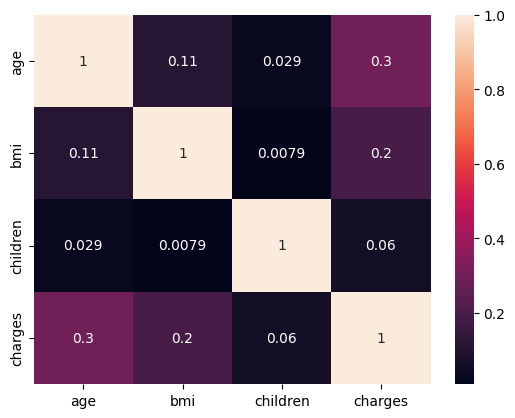

In [11]:
sns.heatmap(df.corr(), annot = True)

In [68]:
X = df.filter(['age'])

X.head(3)

,charges
0,16884.9240
1,1725.5523
2,4449.4620


In [67]:
y  = df['charges']
y.head(3)

0    19
1    18
2    28
Name: age, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [71]:
X_train.head(3)

,charges
450,7512.26700
173,5246.04700
917,35069.37452


In [72]:
X_test.head(3)

,charges
373,36085.219000
347,8334.457550
427,7323.734819


In [73]:
y_train.head(3)

450    39
173    35
917    45
Name: age, dtype: int64

In [74]:
y_test.head(3)

373    26
347    46
427    18
Name: age, dtype: int64

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train,y_train)

LinearRegression()

In [77]:
print('Coefficient of determination:',model.score(X_test, y_test))
print('Intercept:', model.intercept_)

Coefficient of determination: 0.07347237901039638
Intercept: 34.946906773736615


In [78]:
y_prediction = model.predict(X_test)
y_prediction

array([47.75966395, 37.90621764, 37.54734093, 39.11681845, 38.20436164,
       39.729997  , 38.97809052, 35.79768712, 35.88545054, 43.31527905,
       36.85627751, 43.95938382, 35.77159871, 40.06639699, 37.51342499,
       35.98621789, 38.39916474, 41.74456014, 37.58194589, 45.05534886,
       36.60198694, 36.34851239, 35.66434307, 36.41463645, 37.25375221,
       38.79062315, 40.06916421, 38.24321559, 50.54197526, 36.0748969 ,
       38.32159656, 42.39771637, 44.22854891, 35.57521332, 36.88489207,
       38.09678131, 36.99118813, 36.42035106, 35.56631292, 35.88395016,
       39.49080436, 38.46577233, 39.56714393, 37.78265978, 40.00884464,
       39.4709055 , 36.53286737, 35.56030337, 47.54890221, 37.11721629,
       49.18657107, 37.07360336, 43.14295795, 41.0286868 , 35.70564828,
       35.39214108, 41.95930855, 38.53528583, 38.66163556, 38.19257879,
       47.58225601, 39.87782801, 36.69906953, 40.16382411, 40.47007836,
       35.59926936, 39.36075796, 35.9424141 , 36.80320562, 48.33

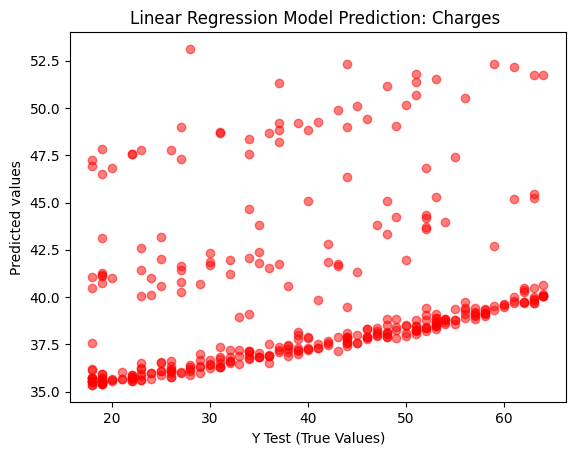

In [79]:
plt.scatter(y_test,y_prediction, color='r', alpha=0.5)
plt.title("Linear Regression Model Prediction: Charges ")
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

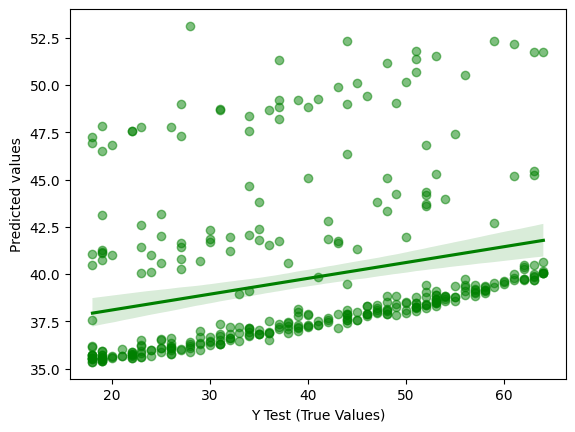

In [80]:
sns.regplot(x = y_test,y = y_prediction, color='g',scatter_kws={'alpha':0.5})
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()